In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\jvrdo\Downloads\insurance.csv")

In [2]:
# First look into data set, displaying first 5 rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Checking the shape of dataset
df.shape

(1338, 7)

We can see how our dataset consists of 1338 rows and 7 columns.

In [4]:
# Check for missing values
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Since this is a pre-cleaned dataset from Kaggle, we can see how there are no missing values!

In [5]:
# Get overall statistics for numerical columns
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
# Since we have three categorical columns (sex, smoker, region), we need to encode them to numerical values

# Mapping male:0, female:1
df["sex"]= df["sex"].map({"female":0,"male":1})

In [7]:
# Checking the result
df["sex"]

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex, Length: 1338, dtype: int64

We can see how we changed the "sex" column to numerical values.

In [8]:
# Doing the same mapping for "smoker" column
df["smoker"]= df["smoker"].map({"no":0,"yes":1})

In [9]:
# Checking result
df["smoker"]

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [10]:
# Since we have 4 distinct regions, we will use pd.get_dummies to encode them, so that we dont give some ordinal ordering to our algorithm
df2= pd.get_dummies(df, columns=['region'])

In [11]:
df2

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


Now, all of our features are encoded/numerical!

In [12]:
# Dividing independant and dependant(target) variables
X= df2.drop("charges", axis=1)

In [13]:
X

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,0,0,1
1,18,1,33.770,1,0,0,0,1,0
2,28,1,33.000,3,0,0,0,1,0
3,33,1,22.705,0,0,0,1,0,0
4,32,1,28.880,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,0,1,0,0
1334,18,0,31.920,0,0,1,0,0,0
1335,18,0,36.850,0,0,0,0,1,0
1336,21,0,25.800,0,0,0,0,0,1


In [14]:
# Placing target variable into y
y= df["charges"]

In [15]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

## Using Train-Test-split to split our data into training set and dev set (test)

In [16]:
 from sklearn.model_selection import train_test_split
 X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.20)

In [17]:
# Importing models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor



In [18]:
# Initiating linear regression
lin_reg = LinearRegression()

# Fitting the train data
lin_reg.fit(X_train, y_train)

# Initiating support vector machine
svr= SVR()

# Fitting SVR to train data
svr.fit(X_train, y_train)

# Initiating Random forrest
rand_forrest= RandomForestRegressor()

# Fitting random forrest to train data
rand_forrest.fit(X_train, y_train)

# Inititing Gradient Boost Regressor
grad_boost= GradientBoostingRegressor()

# Fitting gradient booster to train data
grad_boost.fit(X_train, y_train)

GradientBoostingRegressor()

## Making predictions on test data | Comparing the models

In [19]:
# Predicting on Test data
y_pred1= lin_reg.predict(X_test)

y_pred2= svr.predict(X_test)

y_pred3= rand_forrest.predict(X_test)

y_pred4= grad_boost.predict(X_test)

In [20]:
# Creating a predictions dataframe
df_pred= pd.DataFrame({"True":y_test, "lin_reg":y_pred1, "svr":y_pred2, "rand_forrest":y_pred3, "grad_boost":y_pred4})

In [21]:
# Checking predictions
df_pred.head()

,True,lin_reg,svr,rand_forrest,grad_boost
486,12475.35130,10373.473143,9360.557068,12792.814917,13019.663836
597,5594.84550,8607.505945,9248.110279,7035.680014,7462.304481
896,19798.05455,30928.637440,9297.347276,21089.465535,21161.967086
64,14711.74380,24552.239985,9186.407019,19626.250111,22952.633665
920,13451.12200,11251.659324,9399.501437,14002.710399,15350.365206


Just by glancing at our predictions dataframe, we can see how random forrest and gradient boosting regressor' s predictions are closest to actual values!

## Visual comparison of models

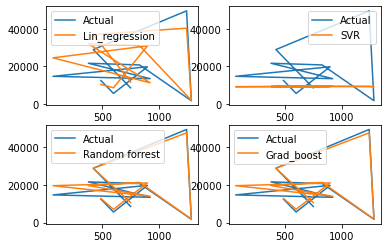

In [22]:
# Creating a plt subplot with 2 rows and 2 columns
plt.subplot(221)

# Comparing first 10 rows with .iloc
plt.plot(df_pred["True"].iloc[0:11], label="Actual")
plt.plot(df_pred["lin_reg"].iloc[0:11], label="Lin_regression")
plt.legend()

# Creating a plt subplot with 2 rows and 2 columns
plt.subplot(222)

# Comparing first 10 rows with .iloc
plt.plot(df_pred["True"].iloc[0:11], label="Actual")
plt.plot(df_pred["svr"].iloc[0:11], label="SVR")
plt.legend()

# Creating a plt subplot with 2 rows and 2 columns
plt.subplot(223)

# Comparing first 10 rows with .iloc
plt.plot(df_pred["True"].iloc[0:11], label="Actual")
plt.plot(df_pred["rand_forrest"].iloc[0:11], label="Random forrest")
plt.legend()

# Creating a plt subplot with 2 rows and 2 columns
plt.subplot(224)

# Comparing first 10 rows with .iloc
plt.plot(df_pred["True"].iloc[0:11], label="Actual")
plt.plot(df_pred["rand_forrest"].iloc[0:11], label="Grad_boost")
plt.legend()

## From the plots, we can discern how Random forrest and Gradient boosting classifier have the best predictions.
On the other hand SVR has the worst predicition, as its function is a straigh line.




## Evaluating the model
We will use Rsquared, which measures the goodness of fit. Higher the R2 - better the model.

In [23]:
from sklearn import metrics

score_1= metrics.r2_score(y_test,y_pred1)

score_2= metrics.r2_score(y_test,y_pred2)

score_3= metrics.r2_score(y_test,y_pred3)

score_4= metrics.r2_score(y_test,y_pred4)

print(score_1,score_2,score_3,score_4)

0.7401236120103525 -0.1259369383354738 0.83412748300036 0.8546540233608189


In [24]:
mse1= metrics.mean_squared_error(y_test,y_pred1)

mse2= metrics.mean_squared_error(y_test,y_pred2)

mse3= metrics.mean_squared_error(y_test,y_pred3)

mse4= metrics.mean_squared_error(y_test,y_pred4)

print(mse1,mse2,mse3,mse4)

mse_list= [mse1, mse2, mse3, mse4]

print(min(mse_list))

43249621.19537094 187382726.26301417 27605137.898264688 24189032.641804446
24189032.641804446


We can see how Gradient boost model achieves the highest R-squared, as well as the lowest MSE. Hence the best choice is the Gradient Boosting Regressor!

## Emulating a predicton on new "customer" data


In [25]:
data= {"age":35, "sex":1, "bmi":28, "children":2, "smoker":0, "region_northeast":1, "region_northwest":0, "region_southeast":0, "region_southwest":0}

new_df= pd.DataFrame(data, index=[0])

In [26]:
new_df

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,35,1,28,2,0,1,0,0,0


In [27]:
new_pred = grad_boost.predict(new_df)

In [28]:
print("The prediction is {}".format(new_pred))

The prediction is [7898.7035528]


## Training the model on the entire dataset

In [29]:
grad_boost.fit(X,y)

GradientBoostingRegressor()

## Saving model with joblib

In [30]:
import joblib

In [31]:
joblib.dump(grad_boost,"joblib_grad_boost")

['joblib_grad_boost']

In [32]:
model= joblib.load("joblib_grad_boost")

In [33]:
model.predict(new_df)

array([8127.15020897])

In [34]:
from tkinter import *
import joblib

In [49]:
def show_entry():
    p1=float(e1.get())
    p2=float(e2.get())
    p3=float(e3.get())
    p4=float(e4.get())
    p5=float(e5.get())
    p6=float(e6.get())
    p7=float(e7.get())
    p8=float(e8.get())
    p9= float(e9.get())
    
    model= joblib.load("joblib_grad_boost")
    result= model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p9]])
    
    Label(master, text= "Insurance Cost").grid(row=10)
    Label(master, text= result).grid(row=11)

master = Tk()
master.title("insurance cost prediction")
label= Label(master, text= "Medical Insurance Cost Prediction", bg="black", fg="white").grid(row=0,columnspan=2)

Label(master, text= "Enter Your Age").grid(row=1)
Label(master, text= "Male or Female (1/0)").grid(row=2)
Label(master, text= "Enter Your BMI value").grid(row=3)
Label(master, text= "Enter Number of Children").grid(row=4)
Label(master, text= "Smoker Yes/No [1/0]").grid(row=5)
Label(master, text= "Region northeast Yes/No [1/0]").grid(row=6)
Label(master, text= "Region northwest Yes/No [1/0]").grid(row=7)
Label(master, text= "Region southheast Yes/No [1/0]").grid(row=8)
Label(master, text= "Region southwest Yes/No [1/0]").grid(row=9)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)

Button(master, text="Predict", command=show_entry).grid()
mainloop()

#### 